In [62]:
# install dependencies

# !pip install prophet
# !pip install yfinance

In [192]:
# Run 1st

import pandas as pd
import requests
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [193]:
nike_search_terms = ["Nike Air Force 1", "best Nike running shoes for women", "comfortable Nike sandals",
                    "Nike basketball shoes price comparison", "Nike leggings", "Nike sports bra", "Nike tech fleece hoodie", "Nike socks",
                    "Nike gym bag", "best Nike smartwatch features", "Nike Dri-FIT", "Nike leggings for yoga",
                    "Nike shorts", "Nike Air Max", "VaporMax", "Nike Zoom Pegasus", "Nike Golf" ]

for i in nike_search_terms:
    print(i)


df_list_big = []
    
i = 5

while i < 29:
    searches = f'Searches{i}'
    df = pd.read_csv(f'resources/nike_SearchResults/multiTimeline ({i}).csv', skiprows=1, header=None, names=['Month', searches])
    df_list_big.append(df)
    i+=1

Nike Air Force 1
best Nike running shoes for women
comfortable Nike sandals
Nike basketball shoes price comparison
Nike leggings
Nike sports bra
Nike tech fleece hoodie
Nike socks
Nike gym bag
best Nike smartwatch features
Nike Dri-FIT
Nike leggings for yoga
Nike shorts
Nike Air Max
VaporMax
Nike Zoom Pegasus
Nike Golf


In [194]:
# Run 2nd

running_shorts_df = pd.read_csv("resources/running_shorts.csv", skiprows=1, header=None, names=['Month', 'Running Shorts'])
tennis_skirt_df = pd.read_csv('resources/tennis_skirt.csv', skiprows=1, header=None, names=['Month', 'Tennis Skirts'])
lulu_lemon_df = pd.read_csv('resources/lululemon.csv', skiprows=1, header=None, names=['Month', 'lululemon Sales'])

# add them all to a list
list_of_dfs = df_list_big

In [195]:
# Run 3rd 
# Clean the dataframes

def clean_dataframes(dfs_list):
    for df in dfs_list:
        df.drop(0, inplace=True)

clean_dataframes(list_of_dfs)

# Display the dataframes

for df in list_of_dfs:
    print(df)


       Month Searches5
1    2014-02         9
2    2014-03         9
3    2014-04         9
4    2014-05         9
5    2014-06         8
..       ...       ...
116  2023-09        25
117  2023-10        24
118  2023-11        34
119  2023-12        37
120  2024-01        26

[120 rows x 2 columns]
       Month Searches6
1    2014-02        85
2    2014-03        98
3    2014-04        79
4    2014-05        78
5    2014-06        65
..       ...       ...
116  2023-09        24
117  2023-10        34
118  2023-11        42
119  2023-12        39
120  2024-01        35

[120 rows x 2 columns]
       Month Searches7
1    2014-02        66
2    2014-03        71
3    2014-04        70
4    2014-05        59
5    2014-06        61
..       ...       ...
116  2023-09        50
117  2023-10        46
118  2023-11        62
119  2023-12        62
120  2024-01        57

[120 rows x 2 columns]
       Month Searches8
1    2014-02         9
2    2014-03        14
3    2014-04        18
4    201

In [196]:
# RUN 4th

def merge_and_plot_dfs(df_list, merge_on='Month', plot=True):
    # Merge all dataframes on the specified column
    merged_df = df_list[0]
    for df in df_list[1:]:
        merged_df = pd.merge(merged_df, df, on=merge_on)

    # Convert relevant columns to numeric, handling non-numeric values
    for col in merged_df.columns:
        if col != merge_on:
            merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

    # Calculate the average
    cols_to_average = [col for col in merged_df.columns if col != merge_on]
    merged_df['Average of Search Terms'] = merged_df[cols_to_average].mean(axis=1)

    return merged_df

merged_df = merge_and_plot_dfs(list_of_dfs)

merged_df

,Month,Searches5,Searches6,Searches7,Searches8,Searches9,Searches10,Searches11,Searches12,Searches13,...,Searches20,Searches21,Searches22,Searches23,Searches24,Searches25,Searches26,Searches27,Searches28,Average of Search Terms
0,2014-02,9,85,66,9,6,51,20,24,2,...,19,45,41,31,36,45,4,59,85,35.666667
1,2014-03,9,98,71,14,7,49,17,24,2,...,20,44,39,34,44,55,4,56,82,37.000000
2,2014-04,9,79,70,18,9,39,14,25,2,...,22,46,41,31,54,57,4,48,70,34.500000
3,2014-05,9,78,59,25,11,38,12,25,0,...,26,46,43,29,51,42,3,40,62,31.625000
4,2014-06,8,65,61,27,13,38,9,33,2,...,28,55,54,24,54,36,2,41,55,32.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-09,25,24,50,11,38,45,30,29,30,...,29,68,40,39,29,34,10,57,58,37.250000
116,2023-10,24,34,46,9,35,73,35,25,37,...,21,60,30,36,30,43,12,55,56,39.000000
117,2023-11,34,42,62,11,54,93,64,36,62,...,29,87,28,52,29,47,13,76,75,56.708333
118,2023-12,37,39,62,12,63,72,59,35,83,...,26,91,18,57,35,46,15,77,83,60.333333


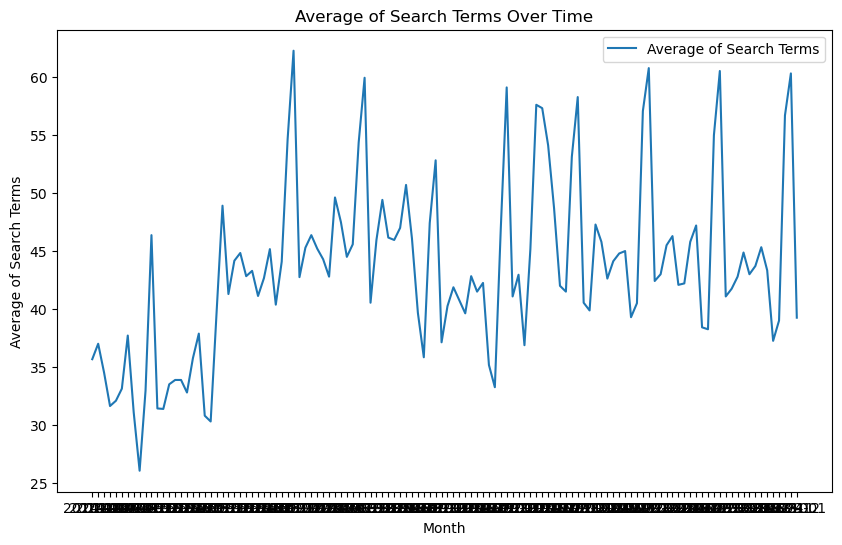

In [197]:
# Plot that

plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.plot(merged_df['Month'], merged_df['Average of Search Terms'], label='Average of Search Terms')

# Setting labels and title
plt.xlabel('Month')
plt.ylabel('Average of Search Terms')
plt.title('Average of Search Terms Over Time')

# Optionally, you can format the x-axis to show dates more clearly

# Adding a legend if necessary
plt.legend()

# Show the plot
plt.show()

In [198]:
# Run 5th

stock_and_google_trends_df = merged_df
merged_df = merged_df[['Month', 'Average of Search Terms']]
merged_df

,Month,Average of Search Terms
0,2014-02,35.666667
1,2014-03,37.000000
2,2014-04,34.500000
3,2014-05,31.625000
4,2014-06,32.083333
...,...,...
115,2023-09,37.250000
116,2023-10,39.000000
117,2023-11,56.708333
118,2023-12,60.333333


In [199]:
# Run 6th

import yfinance as yf
import pandas as pd

def get_stock_data(ticker_symbols, start_date='2014-01-01', end_date='2023-01-01'):
    stock_dfs = []

    for ticker_symbol in ticker_symbols:
        # Fetch stock data
        ticker = yf.Ticker(ticker_symbol)
        hist = ticker.history(start=start_date, end=end_date, interval="1mo")

        # Convert to DataFrame and process
        df = pd.DataFrame(hist).reset_index().rename(columns={'Date': 'Month'})

        # Convert 'Month' to datetime format (if not already)
        df['Month'] = pd.to_datetime(df['Month'])

        # Convert 'Month' to period (year-month format) and then to string (object)
        df['Month'] = df['Month'].dt.to_period('M').astype(str)

        # Create a new DataFrame with 'Month' and 'Close'
        close = f'Close {ticker_symbol}'
        stock_df = df[['Month', 'Close']]
        stock_df = stock_df.rename(columns={'Close': close})
        stock_dfs.append(stock_df)

    return stock_dfs


In [200]:
# Usage
ticker_list = ['NKE']  # Example list of tickers
list_of_stock_dfs = get_stock_data(ticker_list)

list_of_stock_dfs

C:\Users\jorda\AppData\Local\Temp\ipykernel_28308\991570941.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Month'].dt.to_period('M').astype(str)


[       Month   Close NKE
 0    2014-01   32.627930
 1    2014-02   35.068871
 2    2014-03   33.181850
 3    2014-04   32.773026
 4    2014-05   34.552071
 ..       ...         ...
 103  2022-08  104.469940
 104  2022-09   81.573906
 105  2022-10   91.217339
 106  2022-11  107.958878
 107  2022-12  115.163353
 
 [108 rows x 2 columns]]

In [201]:
###############################
merged_stocks = merge_and_plot_dfs(list_of_stock_dfs)

merge_on = 'Month'
columns_to_convert = [col for col in merged_stocks.columns if col != merge_on]

# Apply percent change to each column and multiply by 100 for percentage
for col in columns_to_convert:
    merged_stocks[f'{col} % Change'] = merged_stocks[col].pct_change() * 100

    
columns_to_keep = [merge_on] + [col for col in merged_stocks.columns if '% Change' in col 
                                and col != 'Average of Search Terms % Change']

# Filter the DataFrame to keep only the desired columns
merged_stocks = merged_stocks[columns_to_keep]

cols_to_average = [col for col in merged_stocks.columns if col != merge_on]

merged_stocks['Average of Stocks % chng'] = merged_stocks[cols_to_average].mean(axis=1)
 
merged_stocks = merged_stocks[['Month', 'Average of Stocks % chng']]
merged_stocks.dropna()

C:\Users\jorda\AppData\Local\Temp\ipykernel_28308\1218130240.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_stocks['Average of Stocks % chng'] = merged_stocks[cols_to_average].mean(axis=1)


,Month,Average of Stocks % chng
1,2014-02,7.481139
2,2014-03,-5.380898
3,2014-04,-1.232074
4,2014-05,5.428382
5,2014-06,1.150402
...,...,...
103,2022-08,-7.370347
104,2022-09,-21.916385
105,2022-10,11.821712
106,2022-11,18.353461


In [202]:
# Run 7th
stock_and_google_trends_df = pd.merge(merged_df, merged_stocks, on='Month')
stock_and_google_trends_df

,Month,Average of Search Terms,Average of Stocks % chng
0,2014-02,35.666667,7.481139
1,2014-03,37.000000,-5.380898
2,2014-04,34.500000,-1.232074
3,2014-05,31.625000,5.428382
4,2014-06,32.083333,1.150402
...,...,...,...
102,2022-08,47.208333,-7.370347
103,2022-09,38.416667,-21.916385
104,2022-10,38.250000,11.821712
105,2022-11,55.000000,18.353461


In [203]:
# Run 8th

# Calculate percentage change for 'Stock Price'
#stock_and_google_trends_df['Stock Price % Change'] = stock_and_google_trends_df['Close'].pct_change() * 100

# Calculate percentage change for 'Y4'
stock_and_google_trends_df['Average Search Term % Change'] = stock_and_google_trends_df['Average of Search Terms'].pct_change() * 100
stock_and_google_trends_df.dropna()

,Month,Average of Search Terms,Average of Stocks % chng,Average Search Term % Change
1,2014-03,37.000000,-5.380898,3.738318
2,2014-04,34.500000,-1.232074,-6.756757
3,2014-05,31.625000,5.428382,-8.333333
4,2014-06,32.083333,1.150402,1.449275
5,2014-07,33.125000,-0.541563,3.246753
...,...,...,...,...
102,2022-08,47.208333,-7.370347,3.093722
103,2022-09,38.416667,-21.916385,-18.623124
104,2022-10,38.250000,11.821712,-0.433839
105,2022-11,55.000000,18.353461,43.790850


In [204]:



stock_and_google_trends_df2 = stock_and_google_trends_df[
    stock_and_google_trends_df['Average of Search Terms'] > 49]

new_df = stock_and_google_trends_df2.copy()

# If the 'Month' column contains strings in the 'YYYY-MM' format
new_df['Month'] = new_df['Month'].str[-2:]

frequency = new_df['Month'].value_counts()
frequency

Month
12    7
11    5
07    3
03    1
05    1
06    1
Name: count, dtype: int64

In [205]:
# Run 9th

new_df[['Average Search Term % Change', "Average of Stocks % chng"]].corr()

,Average Search Term % Change,Average of Stocks % chng
Average Search Term % Change,1.000000,0.652168
Average of Stocks % chng,0.652168,1.000000


<Axes: >

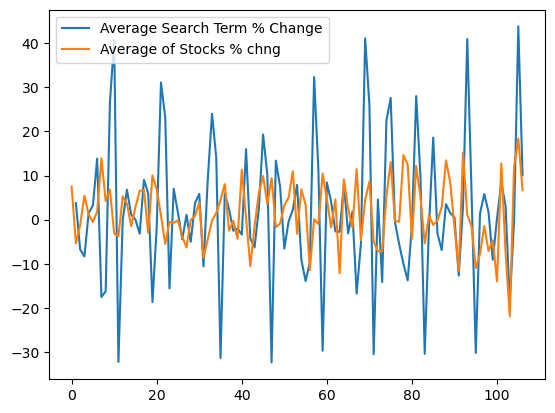

In [206]:
# Run 10th
stock_and_google_trends_df[['Average Search Term % Change', "Average of Stocks % chng"]].plot()

In [207]:
## Prophet Modeling next

In [208]:
# Prophet looping
from prophet import Prophet
import matplotlib.pyplot as plt

# Model for dfs that go > 100
def logistic_forecast(df):
    # Ensure correct column names
    df.columns = ['ds', 'y']
    df['cap'] = 100
    df['floor'] = 0

    model = Prophet(growth='logistic')
    model.fit(df)

    # Make future dataframe and predict
    future = model.make_future_dataframe(periods=60, freq='M')
    future['cap'] = 100
    future['floor'] = 0
    forecast = model.predict(future)

    # Create and save the plot
    fig = model.plot(forecast)
    plt.close(fig)  # Close the plot to prevent it from displaying immediately

    return {'dataframe': forecast, 'plot': fig}


# Main Function

def df_forecast(df_list):
    results = {}  # Dictionary to store forecasts and plots

    for i, df in enumerate(df_list, start=1):
        # Ensure correct column names
        df.columns = ['ds', 'y']

        # Fit the Prophet model
        m = Prophet()
        m.fit(df)

        # Make future dataframe and predict
        future = m.make_future_dataframe(periods=60, freq='M')
        forecast = m.predict(future)

        # Check if any yhat values are above 100
        if forecast['yhat'].max() > 100:
            # Call logistic forecast function
            result = logistic_forecast(df)
        else:
            # Create and save the plot for non-logistic forecast
            fig = m.plot(forecast)
            plt.close(fig)  # Close the plot to prevent it from displaying immediately
            result = {'dataframe': forecast, 'plot': fig}

        # Store forecast and plot in the dictionary
        results[f'forecast{i}'] = result

    return results
    

In [191]:
dfs = list_of_dfs 

all_results = df_forecast(dfs)

22:22:44 - cmdstanpy - INFO - Chain [1] start processing
22:22:44 - cmdstanpy - INFO - Chain [1] done processing
22:22:44 - cmdstanpy - INFO - Chain [1] start processing
22:22:44 - cmdstanpy - INFO - Chain [1] done processing
22:22:44 - cmdstanpy - INFO - Chain [1] start processing
22:22:44 - cmdstanpy - INFO - Chain [1] done processing
22:22:45 - cmdstanpy - INFO - Chain [1] start processing
22:22:45 - cmdstanpy - INFO - Chain [1] done processing
22:22:45 - cmdstanpy - INFO - Chain [1] start processing
22:22:45 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

In [ ]:
from IPython.display import display

for key, result in all_results.items():
    print(key) 
    # Display the forecast DataFrame
    display(result['dataframe'])
    # Display the plot
    fig = result['plot']
    display(fig)
